 # Lego Dataset

## 1. Libraries Loading

In [59]:
import pandas as pd
import re # needed later for cleaning the column base dimensions

## 2. Data Loading

In [60]:
excel = pd.ExcelFile("https://docs.google.com/spreadsheets/d/17o2TJJ3_pmrFsFNIdhxyPW3PFO0zyksoSVbrWzrDJoU/export?format=xlsx")
print(excel.sheet_names)  
df = excel.parse(excel.sheet_names[0]) 


['group1', 'group 2', 'group_3', 'group 4', 'group_5']


## 3. Data Initial Inspection

In [61]:
df.dtypes

id                 float64
color               object
is duplo?             bool
size type           object
base shape          object
base dimensions     object
number of studs      int64
has slope?            bool
slope degree       float64
in stock             int64
dtype: object

In [62]:
df.head()


,id,color,is duplo?,size type,base shape,base dimensions,number of studs,has slope?,slope degree,in stock
0,NaN,Dark Blue,True,Brick,Rectangle,2 x 4,8,False,NaN,1
1,NaN,Green,True,Brick,Rectangle,2 x 4,8,False,NaN,1
2,NaN,Coral,True,Brick,Square,2 x 2,4,False,NaN,1
3,NaN,Red,True,Brick,Square,2 x 2,4,False,NaN,1
4,NaN,White,True,Brick,Square,2 x 2,4,False,NaN,1


In [63]:
# Read all sheets into a list of DataFrames
dfs = [excel.parse(sheet_name) for sheet_name in excel.sheet_names]

# Combine them all together (stack one below the other)
df = pd.concat(dfs, ignore_index=True)


In [64]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               0 non-null      float64
 1   color            204 non-null    object 
 2   is duplo?        204 non-null    object 
 3   size type        204 non-null    object 
 4   base shape       204 non-null    object 
 5   base dimensions  204 non-null    object 
 6   number of studs  204 non-null    int64  
 7   has slope?       204 non-null    object 
 8   slope degree     168 non-null    float64
 9   in stock         204 non-null    object 
 10  transparent      40 non-null     float64
dtypes: float64(3), int64(1), object(7)
memory usage: 17.7+ KB


,id,color,is duplo?,size type,base shape,base dimensions,number of studs,has slope?,slope degree,in stock,transparent
0,NaN,Dark Blue,True,Brick,Rectangle,2 x 4,8,False,NaN,1,NaN
1,NaN,Green,True,Brick,Rectangle,2 x 4,8,False,NaN,1,NaN
2,NaN,Coral,True,Brick,Square,2 x 2,4,False,NaN,1,NaN
3,NaN,Red,True,Brick,Square,2 x 2,4,False,NaN,1,NaN
4,NaN,White,True,Brick,Square,2 x 2,4,False,NaN,1,NaN


In [65]:
df.tail(5)

,id,color,is duplo?,size type,base shape,base dimensions,number of studs,has slope?,slope degree,in stock,transparent
199,NaN,Transparent orange,False,Plate,Square,1*1,0,False,0.0,1,NaN
200,NaN,Blck,False,Plate,Trapezium,2*2,4,False,0.0,1,NaN
201,NaN,Yellow,False,Plate,Rectangle,1*2,0,False,0.0,1,NaN
202,NaN,Transparent sky blue,False,Plate,Round,1*1,0,False,0.0,1,NaN
203,NaN,Transparent yellow,False,Plate,Round,1*1,0,False,0.0,1,NaN


In [66]:
display(df.shape)
display(df.count())

(204, 11)

id                   0
color              204
is duplo?          204
size type          204
base shape         204
base dimensions    204
number of studs    204
has slope?         204
slope degree       168
in stock           204
transparent         40
dtype: int64

In [67]:
# Checking, which values we have in different columns. This step is very important for the Data Cleaning process, because we now know, which values we have to combine.
print(df["is duplo?"].unique())
print(df["size type"].unique())
print(df["base shape"].unique())
print(df["has slope?"].unique())
print(df["slope degree"].unique())
print(df["in stock"].unique())

[True False 'yes' 'no']
['Brick' 'Plate' 'plate' 'brick' 'tile']
['Rectangle' 'Square' 'Circle' 'Trapezium' 'rectangle' 'square' 'triangle'
 'trapezium' 'circle' 'trapezoid' 'Round' 'Wadge']
[False True 'no' 'yes']
[nan 45.  0. 15. 30.]
[1 'yes']


## 4. Data Cleaning

In [68]:
# Create an ID for each Lego
n_rows = len(df)
df["id"] = range(1, n_rows + 1)

# Control if it worked
df.head(), df.tail()

(   id      color is duplo? size type base shape base dimensions  \
 0   1  Dark Blue      True     Brick  Rectangle           2 x 4   
 1   2      Green      True     Brick  Rectangle           2 x 4   
 2   3      Coral      True     Brick     Square           2 x 2   
 3   4        Red      True     Brick     Square           2 x 2   
 4   5      White      True     Brick     Square           2 x 2   
 
    number of studs has slope?  slope degree in stock  transparent  
 0                8      False           NaN        1          NaN  
 1                8      False           NaN        1          NaN  
 2                4      False           NaN        1          NaN  
 3                4      False           NaN        1          NaN  
 4                4      False           NaN        1          NaN  ,
       id                 color is duplo? size type base shape base dimensions  \
 199  200    Transparent orange     False     Plate     Square             1*1   
 200  201  

In [69]:
# Clean the column "is duplo?"

print("Right now there exist the following values in this column':")
print(df["is duplo?"].unique())

Right now there exist the following values in this column':
[True False 'yes' 'no']


In [70]:
# Converting them all to be True and False

mapping = {
    "true": True,
    "false": False,
    "yes": True,
    "no": False,
    "1" : True,
    "0" : False

}

df["is duplo?"] = (
    df["is duplo?"]
    .astype(str)      
    .str.strip()     
    .str.lower()     
    .replace(mapping) 
)

C:\Users\User\AppData\Local\Temp\ipykernel_9488\3457245749.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(mapping)


In [71]:
# Control if it worked

print("After cleaning there exist the following values in this column:")
print(df["is duplo?"].unique())

After cleaning there exist the following values in this column:
[ True False]


In [72]:
# Clean the column "size type"

print("Right now there exist the following values in this column':")
print(df["size type"].unique())

Right now there exist the following values in this column':
['Brick' 'Plate' 'plate' 'brick' 'tile']


In [73]:
# Converting them all to be Brick and Plate. "tile" is also a plate, just with a flat top. It therefore also belongs into the plate category.

mapping = {
    "brick": "Brick",
    "plate": "Plate",
    "tile": "Plate"

}

df["size type"] = (
    df["size type"]
    .astype(str)      
    .str.strip()     
    .str.lower()     
    .replace(mapping) 
)

In [74]:
# Control if it worked

print("After cleaning there exist the following values in this column:")
print(df["size type"].unique())

After cleaning there exist the following values in this column:
['Brick' 'Plate']


In [75]:
# Clean the column "base shape"

print("Right now there exist the following values in this column':")
print(df["base shape"].unique())

Right now there exist the following values in this column':
['Rectangle' 'Square' 'Circle' 'Trapezium' 'rectangle' 'square' 'triangle'
 'trapezium' 'circle' 'trapezoid' 'Round' 'Wadge']


In [76]:
# Merging the values. "Wadge" seems like a strange value, I checked a Lego database, and "Wedges" are usually trapeziums. 

mapping = {
    "rectangle": "Rectangle",
    "square": "Square",
    "circle": "Circle",
    "Round": "Circle",
    "trapezium": "Trapezium",
    "trapeziod": "Trapezium",
    "Wadge": "Trapeziums",
    "triangle": "Triangle", # I like capital latters in the beginning of a word. Just personal preference, I guess.
    "round": "Circle",
    "trapezoid": "Trapezium",
    "wadge": "Trapezium",
    "cirlce": "Circle"


}

df["base shape"] = (
    df["base shape"]
    .astype(str)      
    .str.strip()     
    .str.lower()     
    .replace(mapping) 
)

In [77]:
# Control if it worked

print("After cleaning there exist the following values in this column:")
print(df["base shape"].unique())

After cleaning there exist the following values in this column:
['Rectangle' 'Square' 'Circle' 'Trapezium' 'Triangle']


In [78]:
# Clean the column base dimensions. This is rather difficult, because every group used a different format. We will put them all in the format smaller number x larger number, without a space in between.

def normalize_base_dimensions(val):
    if pd.isna(val):
        return pd.NA
    nums = re.findall(r'\d+', str(val))
    if len(nums) < 2:
        return pd.NA
    a, b = map(int, nums[:2])
    a, b = sorted((a, b))
    return f"{a}x{b}"

df["base dimensions"] = df["base dimensions"].apply(normalize_base_dimensions)

# Control if this worked
print(df["base dimensions"].unique())

['2x4' '2x2' '2x8' '1x4' '1x3' '2x6' '1x2' '4x6' '1x1' '2x3' '0x0' '4x4']


In [79]:
# Clean the column "has slope?"

print("Right now there exist the following values in this column':")
print(df["has slope?"].unique())

Right now there exist the following values in this column':
[False True 'no' 'yes']


In [80]:
# Converting them all to be True and False

mapping = {
    "true": True,
    "false": False,
    "yes": True,
    "no": False,
    "1" : True,
    "0" : False

}

df["has slope?"] = (
    df["has slope?"]
    .astype(str)      
    .str.strip()     
    .str.lower()     
    .replace(mapping) 
)

C:\Users\User\AppData\Local\Temp\ipykernel_9488\2322443348.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(mapping)


In [81]:
# Control if it worked

print("After cleaning there exist the following values in this column:")
print(df["has slope?"].unique())

After cleaning there exist the following values in this column:
[False  True]


In [82]:
# Clean the column "slope degree"

print("Right now there exist the following values in this column':")
print(df["slope degree"].unique())

Right now there exist the following values in this column':
[nan 45.  0. 15. 30.]


In [83]:
# I do not like the N/As. I will merge them with the zeros.

mapping = {
    "N/A": 0,
    "nan": 0

}

df["slope degree"] = (
    df["slope degree"]
    .astype(str)      
    .str.strip()     
    .str.lower()     
    .replace(mapping)
    .pipe(pd.to_numeric, errors="coerce")  
    .fillna(0)             
)

In [84]:
# Control if it worked

print("After cleaning there exist the following values in this column:")
print(df["slope degree"].unique())

After cleaning there exist the following values in this column:
[ 0. 45. 15. 30.]


In [85]:
# Clean the column "in stock":
print("Right now there exist the following values in this column':")
print(df["in stock"].unique())

Right now there exist the following values in this column':
[1 'yes']


In [86]:
# "yes" as an answer is not what we want, as we want to know how many we have. Yes will therefore be merged into the 1s.

mapping = {
    "yes": 1

}

df["in stock"] = (
    df["in stock"]
    .astype(str)      
    .str.strip()     
    .str.lower()     
    .replace(mapping)
    .pipe(pd.to_numeric, errors="coerce")  
    .fillna(0)  
)

In [87]:
# Control if it worked

print("After cleaning there exist the following values in this column:")
print(df["in stock"].unique())

After cleaning there exist the following values in this column:
[1]


In [88]:
# The column "transparent" is problematic because only one group used it. 
# I will delete it because there is no information on this for most of the Lego pieces and having this column will make it harder to find duplicates.

df = df.drop(columns=["transparent"])

# Control
print(df.columns)

Index(['id', 'color', 'is duplo?', 'size type', 'base shape',
       'base dimensions', 'number of studs', 'has slope?', 'slope degree',
       'in stock'],
      dtype='object')


In [89]:
# The biggest problem are the colours. There are so many differnt colours and they are all in different formats.
# I will try and normalize them in the following way: All colours should start with a capital letter, f.e. "Blue". 
# Modifiers will be in front of the colour, also with a capital letter, f.e. "Dark Blue". 

# vocabulary: define modifiers and colours by looking at the original dataset
MODS   = r"(dark|light|bright|trans|transparent|mud|neon|shiny|olive|sky|lime|brick|navy|baby|hot|deep)"
BASES  = r"(blue|red|green|yellow|orange|purple|brown|black|white|gray|grey|tan|pink|magenta|cyan|gold|silver|bronze)"

# 1) if words are written together, there will be a space in between
PAT_COMPOUND_2 = re.compile(fr"\b{MODS}{BASES}\b")              # z.B. 'darkblue'
PAT_COMPOUND_3 = re.compile(fr"\b{MODS}{MODS}{BASES}\b")        # z.B. 'verydarkblue'

def normalize_color(s: str) -> str:
    if s is None:
        return s
    x = str(s).strip().lower()

    # normalize the separation
    x = re.sub(r"[_\-\/]+", " ", x)     

    # split words that are written together (f.e. darkblue)
    x = PAT_COMPOUND_3.sub(r"\1 \2 \3", x)
    x = PAT_COMPOUND_2.sub(r"\1 \2", x)

    # additional cleaning
    x = re.sub(fr"\b{MODS}\s+{BASES}\b", r"\1 \2", x)
    x = re.sub(r"\s+", " ", x).strip()

    # Title-Case 
    return x.title() if x else x

# apply
df["color"] = df["color"].apply(normalize_color)

# control
print(df["color"].unique())

['Dark Blue' 'Green' 'Coral' 'Red' 'White' 'Light Green' 'Orange' 'Yellow'
 'Brown' 'Purple' 'Lilac' 'Orchid' 'Dark Grey' 'Light Grey' 'Pink'
 'Dark Green' 'Cream' 'Black' 'Red Brown' 'Neon Yellow' 'Cyan'
 'Denim Blue' 'Ice Blue' 'Capri' 'Shiny Green' 'Olive Green' 'Beige'
 'Bright Pink' 'Transparent' 'Light Brown' 'Light Pink' 'Dark Pink'
 'Dark Purple' 'Light Purple' 'Grey' 'Mud Brown' 'Turquoise' 'Light Blue'
 'Neon Orange' 'Neon Dark Yellow' 'Neon Light Yellow' 'Dark Brown'
 'Bright Green' 'Peach' 'Blue' 'Pear' 'Sky Blue' 'Bright Yellow'
 'Navy Blue' 'Maroon' 'Khaki' 'Neon Green' 'Neon Blue' 'Lime Green'
 'Brick Red' 'Baby Blue' 'Cafe' 'Hot Magent' 'Deep Blue'
 'Transparent Yellow' 'Transparent Orange' 'Blck' 'Transparent Sky Blue']


In [90]:
# Now I want to look at the dataset and see if everything worked out.
# export as csv
df.to_csv("lego_cleaned.csv", index=False)


In [91]:
# The Dataset looks really nice. Only problem is that slope degree is shown as 450 instead of 45. This needs to be fixed.

df["slope degree"] = pd.to_numeric(df["slope degree"], errors="coerce")

# the maximum slop can be 90
df.loc[df["slope degree"] > 90, "slope degree"] = df["slope degree"] / 10

# control
print(df["slope degree"].unique())

[ 0. 45. 15. 30.]


In [92]:
# Now we can finally check for duplicates.

# ID has to be ignored for this
cols_to_check = [col for col in df.columns if col != "id"]

# find duplicates
duplicate_mask = df.duplicated(subset=cols_to_check, keep=False)

# extract duplicates
duplicates = df[duplicate_mask].sort_values(by=cols_to_check)

# number of duplicates
num_duplicates = duplicates.shape[0]

print(f"there are {num_duplicates} duplicates")

# control: show duplicates
display(duplicates)



there are 34 duplicates


,id,color,is duplo?,size type,base shape,base dimensions,number of studs,has slope?,slope degree,in stock
24,25,Black,False,Plate,Square,1x2,2,False,0.0,1
65,66,Black,False,Plate,Square,1x2,2,False,0.0,1
108,109,Black,False,Plate,Square,2x2,2,False,0.0,1
150,151,Black,False,Plate,Square,2x2,2,False,0.0,1
176,177,Black,False,Plate,Square,2x2,2,False,0.0,1
89,90,Blue,False,Brick,Rectangle,2x6,12,False,0.0,1
130,131,Blue,False,Brick,Rectangle,2x6,12,False,0.0,1
175,176,Blue,False,Brick,Rectangle,2x6,12,False,0.0,1
86,87,Blue,True,Brick,Square,2x2,4,False,0.0,1
165,166,Blue,True,Brick,Square,2x2,4,False,0.0,1


In [93]:
# Wow. This is more than I expected, good stuff. Now lets merge them together and add the number in stock

# 1) make sure "in stock" is a numerical value
df["in stock"] = (
    pd.to_numeric(df["in stock"], errors="coerce")
      .fillna(0)
      .astype(int)
)

# 2) ddefine key columns
key_cols = [c for c in df.columns if c not in ["id", "in stock"]]

# 3) Merge duplicates by adding "in stock"
merged = (
    df.groupby(key_cols, dropna=False, as_index=False)
      .agg({"in stock": "sum"})
)

# 4) New IDs
merged.insert(0, "id", range(1, len(merged) + 1))

# 5) How many rows were merged and deleted?
orig_n = len(df)
new_n  = len(merged)
print(f"Before: {orig_n} rows |  After: {new_n}  |  Deleted: {orig_n - new_n}")

# 6) List groups that were duplicates
dupe_groups = (
    df.groupby(key_cols, dropna=False)
      .size()
      .reset_index(name="count")
      .query("count > 1")
      .sort_values("count", ascending=False)
)
print("Duplicates:\n", dupe_groups.head(20))

df = merged


Before: 204 rows |  After: 185  |  Deleted: 19
Duplicates:
          color  is duplo? size type base shape base dimensions  \
13       Black      False     Plate     Square             2x2   
18        Blue      False     Brick  Rectangle             2x6   
65       Green       True     Brick  Rectangle             2x4   
144        Red       True     Brick  Rectangle             2x4   
12       Black      False     Plate     Square             1x2   
43   Dark Blue      False     Brick  Rectangle             2x6   
23        Blue       True     Brick     Square             2x2   
47   Dark Blue       True     Brick  Rectangle             2x4   
137        Red      False     Brick     Circle             2x2   
145        Red       True     Brick     Square             2x2   
168      White      False     Plate  Rectangle             2x4   
173     Yellow      False     Brick  Rectangle             1x2   
175     Yellow      False     Brick  Rectangle             2x4   
181     Yellow  

In [94]:
# Now it should be done. I want to look at the Dataset again.

# export as csv
df.to_csv("lego_final.csv", index=False)

In [95]:
# Slope degree is still shown wrong. I will fix it by converting the variable into an Integer.

df["slope degree"] = df["slope degree"].round().astype("Int64")

# Control
print(df["slope degree"].unique())
print(df["slope degree"].dtype)


<IntegerArray>
[0, 45, 15, 30]
Length: 4, dtype: Int64
Int64


## 5. Data Final Inspection

In [96]:
# export as csv
df.to_csv("lego_cleaned_final.csv", index=False)

In [97]:
# Descripitive statistics for numeric values

numeric_cols = ["number of studs", "slope degree", "in stock"]

df[numeric_cols].describe()

,number of studs,slope degree,in stock
count,185.000000,185.0,185.000000
mean,4.751351,5.594595,1.102703
std,5.111029,14.722911,0.368963
min,0.000000,0.0,1.000000
25%,2.000000,0.0,1.000000
50%,4.000000,0.0,1.000000
75%,6.000000,0.0,1.000000
max,24.000000,45.0,3.000000


In [98]:
# Descriptive statistics for categorial columns

cat_cols = ["color", "size type", "base shape", "base dimensions", "has slope?", "is duplo?"]

for col in cat_cols:
    print(f"\nColumn: {col}")
    print(f"Count: {df[col].count()}")
    print(f"Number of unique values: {df[col].nunique()}")
    print(f"Most frequent value: {df[col].mode()[0]}")
    print(f"Most frequent value (frequency): {df[col].value_counts().iloc[0]}")
    print(f"Least frequent value: {df[col].value_counts().index[-1]}")
    print(f"Least frequent value (frequency): {df[col].value_counts().iloc[-1]}")



Column: color
Count: 185
Number of unique values: 63
Most frequent value: Grey
Most frequent value (frequency): 12
Least frequent value: Transparent Orange
Least frequent value (frequency): 1

Column: size type
Count: 185
Number of unique values: 2
Most frequent value: Plate
Most frequent value (frequency): 103
Least frequent value: Brick
Least frequent value (frequency): 82

Column: base shape
Count: 185
Number of unique values: 5
Most frequent value: Rectangle
Most frequent value (frequency): 97
Least frequent value: Triangle
Least frequent value (frequency): 2

Column: base dimensions
Count: 185
Number of unique values: 12
Most frequent value: 2x2
Most frequent value (frequency): 41
Least frequent value: 4x4
Least frequent value (frequency): 3

Column: has slope?
Count: 185
Number of unique values: 2
Most frequent value: False
Most frequent value (frequency): 161
Least frequent value: True
Least frequent value (frequency): 24

Column: is duplo?
Count: 185
Number of unique values: 2

## 6. Basic exploration plots

<Axes: title={'center': 'Number of Studs - Frequency'}, xlabel='Number of Studs', ylabel='Count'>

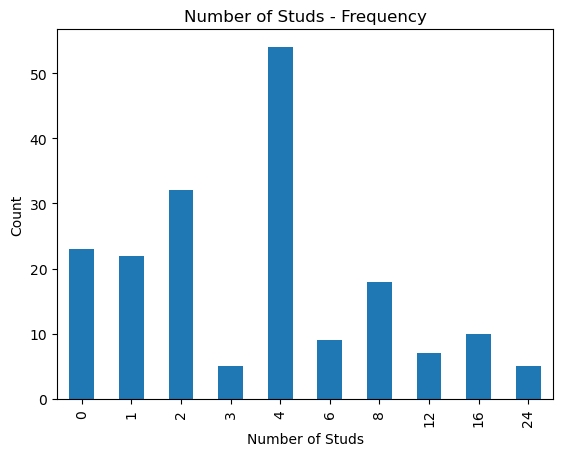

In [99]:
# Barplot for "number of studs"

df["number of studs"].value_counts().sort_index().plot(
    kind="bar",
    title="Number of Studs - Frequency",
    xlabel="Number of Studs",
    ylabel="Count"
)

<Axes: title={'center': 'Boxplot of Number of Studs'}>

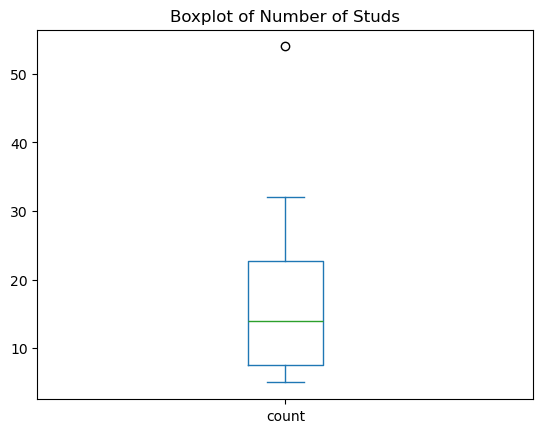

In [100]:
# Boxplot for "number of studs"

df["number of studs"].value_counts().sort_index().plot(
    kind="box",
    title="Boxplot of Number of Studs",
)

<Axes: title={'center': 'In Stock - Frequency'}, xlabel='In Stock Quantity', ylabel='Count'>

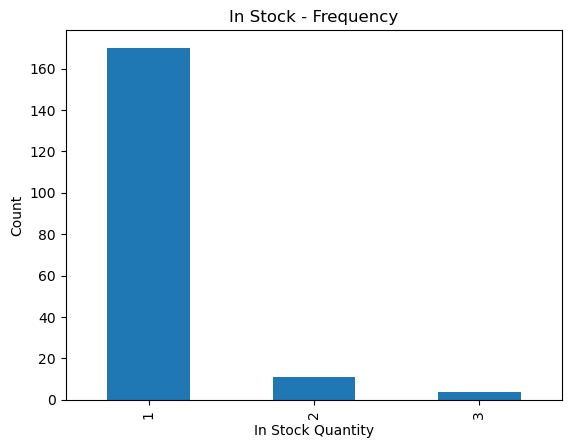

In [101]:
# Barplot for "in stock"
df["in stock"].value_counts().sort_index().plot(
    kind="bar",
    title="In Stock - Frequency",
    xlabel="In Stock Quantity",
    ylabel="Count"
)

<Axes: title={'center': 'Base Shape - Frequency'}, xlabel='Base Shape', ylabel='Count'>

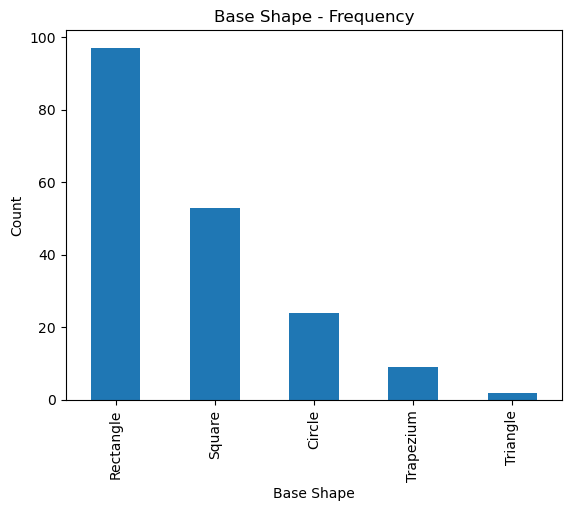

In [102]:
# Barplot for "base shape"

df["base shape"].value_counts().plot(
    kind="bar",
    title="Base Shape - Frequency",
    xlabel="Base Shape",
    ylabel="Count"
)

<Axes: title={'center': 'Top 10 Most Frequent Colors'}, xlabel='Color', ylabel='Count'>

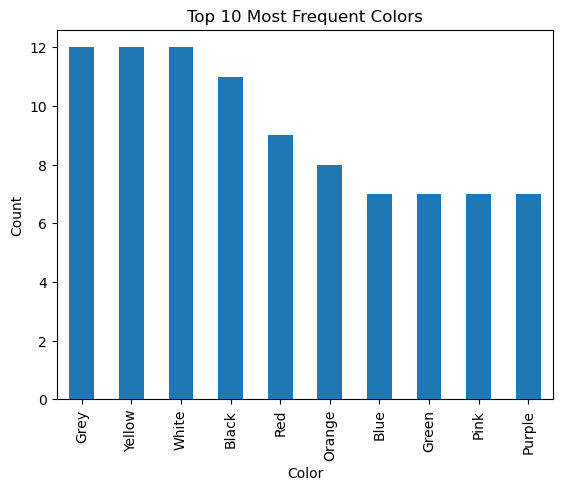

In [103]:
# Barplot for "colour", but only for the 10 most frequent values

df["color"].value_counts().head(10).plot(
    kind="bar",
    title="Top 10 Most Frequent Colors",
    xlabel="Color",
    ylabel="Count"
)

<Axes: title={'center': 'Count of Duplo vs Non-Duplo'}, xlabel='Is Duplo?', ylabel='Count'>

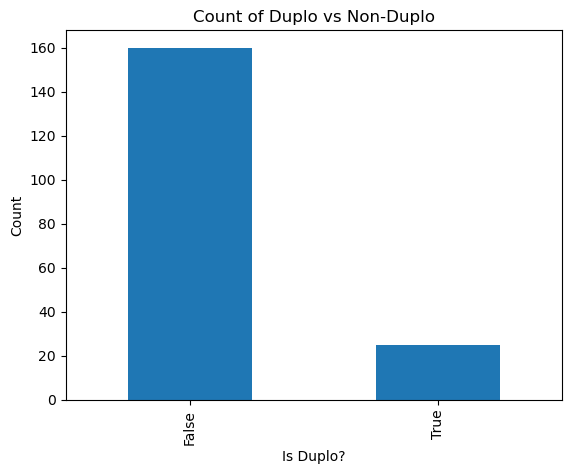

In [104]:
# Barplot for "is duplo?"

df["is duplo?"].value_counts().plot(
    kind="bar",
    title="Count of Duplo vs Non-Duplo",
    xlabel="Is Duplo?",
    ylabel="Count"
)

<Axes: title={'center': 'Count of sloped Lego vs. non-sloped Lego'}, xlabel='Has Slope?', ylabel='Count'>

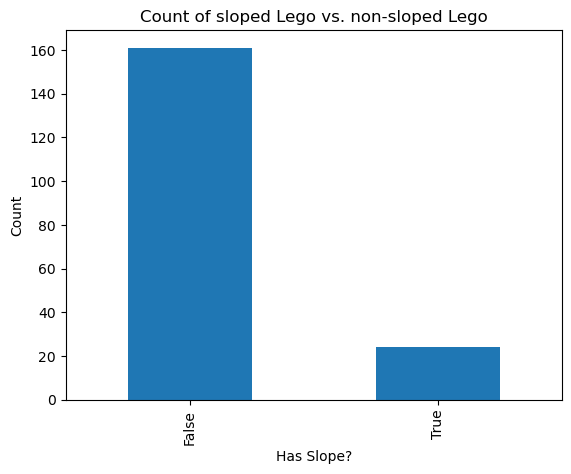

In [105]:
# Barplot for "has slope?"

df["has slope?"].value_counts().plot(
    kind="bar",
    title="Count of sloped Lego vs. non-sloped Lego",
    xlabel="Has Slope?",
    ylabel="Count"
)